---
Pandas 이용한 CCTV 현황 분석
---

In [1]:
# CCTV 현황 데이터 읽기
import numpy as np
import pandas as pd

# 데이터 로딩
CCTV_Seoul = pd.read_csv(
    './data/01. CCTV_in_Seoul.csv'
    , encoding='utf-8'  
)
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [2]:
# 데이터 탐색
# 정렬, describe, info, head()
CCTV_Seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [3]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [ ]:
# 정렬해서 데이터 확인 : 소개 ASC
CCTV_Seoul.sort_values(
    by='소계' # 컬럼명
    ,ascending=True # default
).head()


,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204
1,강동구,773,379,99,155,377
3,강서구,884,388,258,184,81
19,영등포구,904,495,214,195,373


In [7]:
# DESC
CCTV_Seoul.sort_values(
    by='소계'
    , ascending=False
).head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [10]:
# 최근 증가율 구하고 컬럼 추가
# CCTV_Seoul['최근증가율'] = (14+15+16) / CCTV_Seoul['2013년도 이전']* 100
CCTV_Seoul['최근증가율'] =(CCTV_Seoul['2014년'] \
                        + CCTV_Seoul['2015년'] \
                        + CCTV_Seoul['2016년']) \
                        / CCTV_Seoul['2013년도 이전']* 100
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [11]:
# 최근 3년간 많이 증가한 구를 확인 : 정렬
CCTV_Seoul.sort_values(
    by='최근증가율'
    , ascending=False
).head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [12]:
# 컬럼명 변경 : 기관명 => 구별 변경
CCTV_Seoul.rename(
    columns={
        CCTV_Seoul.columns[0] : '구별'
    }
    , inplace =True
)
CCTV_Seoul.head()


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [ ]:
# 인구 현황 
POP_Seoul = pd.read_excel(
    './data/01. population_in_Seoul.xls'
    , header=2
    , usecols='B,D,G,J,N'
)
POP_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [ ]:
# 컬럼명 변경 : rename
POP_Seoul.rename(
    columns={
        POP_Seoul.columns[0] : '구별'
        ,POP_Seoul.columns[1] : '인구수'
        ,POP_Seoul.columns[2] : '한국인'
        ,POP_Seoul.columns[3] : '외쿡인'
        ,POP_Seoul.columns[4] : '고령자'
        
    }
    , inplace=True # 원본 반영 메소드
)
POP_Seoul.head()

,구별,인구수,한국인,외쿡인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [ ]:
# 데이터프레임에서 행,컬럼 삭제 : drop([정수인덱스], axis=0,1, inplace)
# axis =0 : 행방향으로 => 행을 지우는게 아니라 열이 지워짐
# axis =1 : 열방향으로 => 열을 지우는게 아니라 행이 지워짐
POP_Seoul.drop(
    [0] # [0] : 0번행 삭제, 리스트 : 여러개 삭제 가능
    , axis=0
    , inplace=True
)

# inplace 사용시 주의
# drop(inplace=False) : 복사된 오브젝트에서 삭제된 데이터프레임 반환, head() 가능
# drop(inplace=True)  : 삭제가 원본에 반영이된다. 복사본이 없다, 데이터프레임 반환이 아니라 None 반환 => 메소드 사용 불가 => head() 불가능


In [19]:
POP_Seoul.head()

,구별,인구수,한국인,외쿡인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [20]:
# 구별 컬럼에 중복값 확인 : 중복값 제거 => unique()
POP_Seoul['구별'].unique()


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [21]:
# nan 값 들어 있는 행 확인 : 블린 인덱싱 사용
# isnull() : nan 값을 찾아서 boolean return : nan True
POP_Seoul['구별'].isnull()


1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [30]:
# nan 값이 들어 있는 행 추출
POP_Seoul[POP_Seoul['구별'].isnull()]

,구별,인구수,한국인,외쿡인,고령자


In [ ]:
# drop
POP_Seoul.drop(
    [26]
    , axis=0
    , inplace=True    
) # return None : 메소드 실행 안된다.



In [71]:
# 인구현황 파일 저장 
# to_csv : 데이터프레임을 csv 파일에 저장
# csv로 저장하면 인덱스까지 전부 저장해옴 
POP_Seoul.to_csv('./data/01 인구현황 nan 삭제까지.csv')
CCTV_Seoul.to_csv('./data/01 CCTV 현황 중간 데이터.csv')

In [75]:
# 구별 컬럼의 중복값 확인 : 중복값 제거 => unique()
import numpy as np
import pandas as pd

CCTV_Seoul =pd.read_csv(
    './data/01. CCTV_in_Seoul.csv'
    , encoding='utf-8'
)

# 인구 현황
import numpy as np
import pandas as pd

POP_Seoul =pd.read_excel(
    './data/01. population_in_Seoul.xls'
    , header=2
    , usecols='B,D,G,J,N'
)

POP_Seoul.rename(
    columns={
        POP_Seoul.columns[0] : '구별'
        ,POP_Seoul.columns[1] : '인구수'
        ,POP_Seoul.columns[2] : '한국인 수'
        ,POP_Seoul.columns[3] : '외국인 수'
        ,POP_Seoul.columns[4] : '고령자 수'
    },
    inplace=True
)

POP_Seoul.drop(
    [0] #[0] : 0번행 삭제, 리스트 : 여러개 삭제 가능
    ,axis=0
    ,inplace=True
)

POP_Seoul[POP_Seoul['구별'].isnull()]

,구별,인구수,한국인 수,외국인 수,고령자 수
26,NaN,NaN,NaN,NaN,NaN


In [1]:
# csv 파일 읽기
# 1. CCTV 현황
import pandas as pd
import numpy as np

CCTV_Seoul = pd.read_csv(
    './data/01 CCTV 현황 중간 데이터.csv'
    , encoding= ' utf-8'
    , index_col=0 # 0번 컬럼을 인덱스 보내라
)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [2]:
POP_Seoul = pd.read_csv(
    './data/01 인구현황 nan 삭제까지.csv'
    ,encoding='utf-8'
    , index_col=0   
)
POP_Seoul.head()

,구별,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [6]:
# 인구 현황에서 외국인, 고령자 비율 구하기(인구수 대비)
# 새로운 컬럼 생성 댕비
POP_Seoul['외국인비율'] = POP_Seoul['외쿡인'] / POP_Seoul['인구수'] * 100
POP_Seoul['고령자비율'] = POP_Seoul['고령자'] / POP_Seoul['인구수'] * 100

POP_Seoul.head()

,구별,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [9]:
# 인구수 정렬
# POP_Seoul : dataframe object
POP_Seoul.sort_values(
    by='인구수' # 정렬할 컬럼 지정
    , ascending=False
).head()

,구별,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [12]:
# 외국인 데이터 확인
POP_Seoul.sort_values(
    by='외국인비율'
    ,ascending=False
).head()


,구별,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [14]:
# 고령자 데이터 확인
POP_Seoul.sort_values(
    by='고령자비율'
    , ascending=False
).head()

,구별,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [ ]:
# CCTV, 인구현황 dataframe 병합


In [15]:
df1 = pd.DataFrame({
      'A' : ['A0','A1','A2','A3']
    , 'B' : ['B0','B1','B2','B3']
    , 'C' : ['C0','C1','C2','C3']
    , 'D' : ['D0','D1','D2','D3']
}
, index=[0,1,2,3]
)


df2 = pd.DataFrame({
      'A' : ['A4','A5','A6','A7']
    , 'B' : ['B4','B5','B6','B7']
    , 'C' : ['C4','C5','C6','C7']
    , 'D' : ['D4','D5','D6','D7']
}
, index=[4,5,6,7]
)


df3 = pd.DataFrame({
      'A' : ['A8','A9','A10','A11']
      , 'B' : ['B8','B9','B10','B11']
      , 'C' : ['C8','C9','C10','C11']
      , 'D' : ['D8','D9','D10','D11']
}
, index=[8,9,10,11]
)


In [16]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [17]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [18]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [19]:
# 3개 데이터프레임을 병합 : concat([데이터프레임들], axis=0,1)
# axis = 0 : 아래로 병합, default 
# axis = 1 : 옆으로 병합
# 아래로 병합 진행
result = pd.concat(
    [df1, df2, df3]
    , axis= 0 # 아래로 병합, 컬럼명 기준으로 병합
)
result



,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [25]:
result = pd.concat(
    [df1,df2,df3]
    , axis=0
    , keys=['x','y','z']
)
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [26]:

# 위 결과에서 index 다루기
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [27]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [28]:
result.index.get_level_values(1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [29]:
# 새로운 데이터프레임 생성 : df4 => 컬럼 : 'B','D','F' 인덱스 : 2,3,6,7
# df4, df1 병합
df4 = pd.DataFrame({
      'B' : ['B2','B3','B6','B7']
    , 'D' : ['D2','D3','D6','D7']
    , 'F' : ['F2','F3','F6','F7']
}
, index=[2,3,6,7])
df4


,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [30]:
# df1, df4 병합
df1, df4

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     B   D   F
 2  B2  D2  F2
 3  B3  D3  F3
 6  B6  D6  F6
 7  B7  D7  F7)

In [37]:
# 옆으로 병합 : concat([데이터프레임들], axis=1, join='inner')
result = pd.concat(
    [df1, df4]
    , axis=1 # 옆으로 병합, 인덱스 값이 키가 된다
    # , join='outer' => default(fullouterjoin)
    , join = 'outer'
)
result


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [40]:
# 이너조인 : 키가 동일한것만 조인
result = pd.concat(
    [df1, df4]
    , axis=1
    , join='inner'
)
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [44]:
# 아래로 병합 : axis=0
result = pd.concat(
   [df1,df4]
   , axis=0
   , join = 'inner'
)
result

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [ ]:
result = pd.concat(
    [df1,df4]
    , axis=1
    , join='outer'
    , join_axes=[df1.index]
)
result

TypeError: concat() got an unexpected keyword argument 'join_axis'

In [49]:
# axis=0, join=outer 처리하겠다 의미
result = pd.concat(
    [df1,df4]
    , ignore_index=True # 기본 인덱스를 무시하고 새로 처리해라   
)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [159]:
# merge()
left1 = pd.DataFrame({
    'key' : ['k0','k4','k2','k3']
    , 'A' : ['a0','a1','a2','a3']
    , 'B' : ['b0','b1','b2','b3']
})
right = pd.DataFrame({
    'key' : ['k0','k1','k2','k3']
    , 'C' : ['c0','c1','c2','c3']
    , 'D' : ['d0','d1','d2','d3']
})



In [160]:
left1, right

(  key   A   B
 0  k0  a0  b0
 1  k4  a1  b1
 2  k2  a2  b2
 3  k3  a3  b3,
   key   C   D
 0  k0  c0  d0
 1  k1  c1  d1
 2  k2  c2  d2
 3  k3  c3  d3)

In [ ]:
pd.merge(
    left=left1
    ,right=right
    , on='key'  # 조인할 컬럼명 지정 
    #  , how= 'inner'    # inner join default  
    #  , how= 'outer'    # outer join default  
    #  , how= 'left'     # left  outer join default  
     , how= 'right'    # right outer join default  
)


,key,A,B,C,D
0,k0,a0,b0,c0,d0
1,k1,NaN,NaN,c1,d1
2,k2,a2,b2,c2,d2
3,k3,a3,b3,c3,d3


---
## CCTV, 인구현황 병합,분석
---

In [3]:
## 데이터 확인
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [4]:
# 인구현황 데이터 확인
POP_Seoul.head()

,구별,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [13]:
# CCTV, 인구현황 merge
data_result = pd.merge(
    left=CCTV_Seoul # left 갈 데이터프레임 지정
    , right=POP_Seoul # right 갈 데이터프레임 지정
    , on= '구별' # 조인조건, 조인할 컬럼 지정
    , how= 'inner' # 조인 방법(inner, outer, left outer, right outer)
)
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [14]:
# 불필요한 컬럼 삭제
del data_result['2013년도 이전'] # Series object 삭제
del data_result['2014년'] # Series object 삭제
del data_result['2015년'] # Series object 삭제
del data_result['2016년'] # Series object 삭제


In [15]:
# 구별이라는 컬럼을 키로 사용하기 위해
# 구별이 키다 => 인덱스 보내는게 상당히 데이터 처리, 차트 처리시 편리하다.
# data_result.set_index('컬럼명', inplace=True)
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [ ]:
# 소계와 인구현황 컬럼들과 상관계수를 출력
# 상관계수 : -1 ~ 1 , 0 에 가까우면 관계없다
# 넘파이에 상관계수를 구하는 함수수 : corrcoef(컬럼들)
# 인구수와 소계 (CCTV 갯수)
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

---
#### 데이터 시각화
---

plot 종류
1. 라인플롯
2. 스캐터 플롯
3. 바 차트
4. 히스토그램
5. 박스 플롯
6. 컨투어 플롯
7. 서피스 플롯
8. 등등

- matplotlib library 시각화 

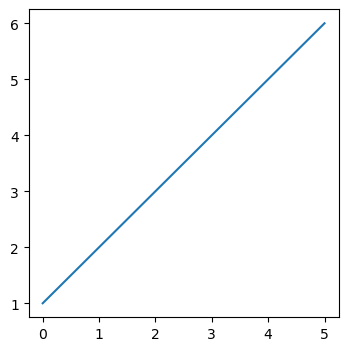

In [17]:
# line plot : 선그래프 
# pyplot =>matplotlib 서브 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt # 주로 사용

# 시각화 단계
# 1. 도화지 준비(그릴 준비하는 것) : figure()
plt.figure(
    figsize=(4,4) # 도화지 크기 지정
)
#2. plot : 그린다
plt.plot([1,2,3,4,5,6])
# 3. 화면 출력 
plt.show()

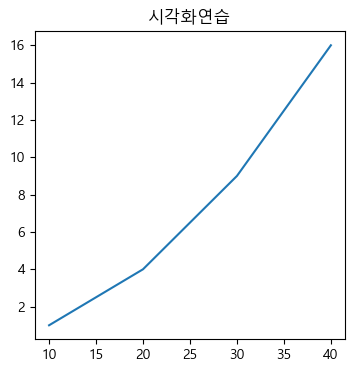

In [20]:
# 경고를 무시해라 - 화면에 표시하지 마라
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams # matplotlib 환경설정 모듈
rcParams['font.family'] = 'Malgun Gothic' # 한글 글꼴 설정
rcParams['axes.unicode_minus'] = False

# title 부여
plt.figure(figsize=(4,4))
plt.title('시각화연습')
# 데이터 직접 지정
plt.plot([10,20,30,40],[1,4,9,16])
plt.show()

In [44]:
# line plot
# range() => return list
# arrange() => return ndarray(numpy)
x = np.arange(0,12,0.001) # (시작값, 종료값, 스텝 ), 1200개 데이터
y = np.sin(x) # 1200개 데이터 


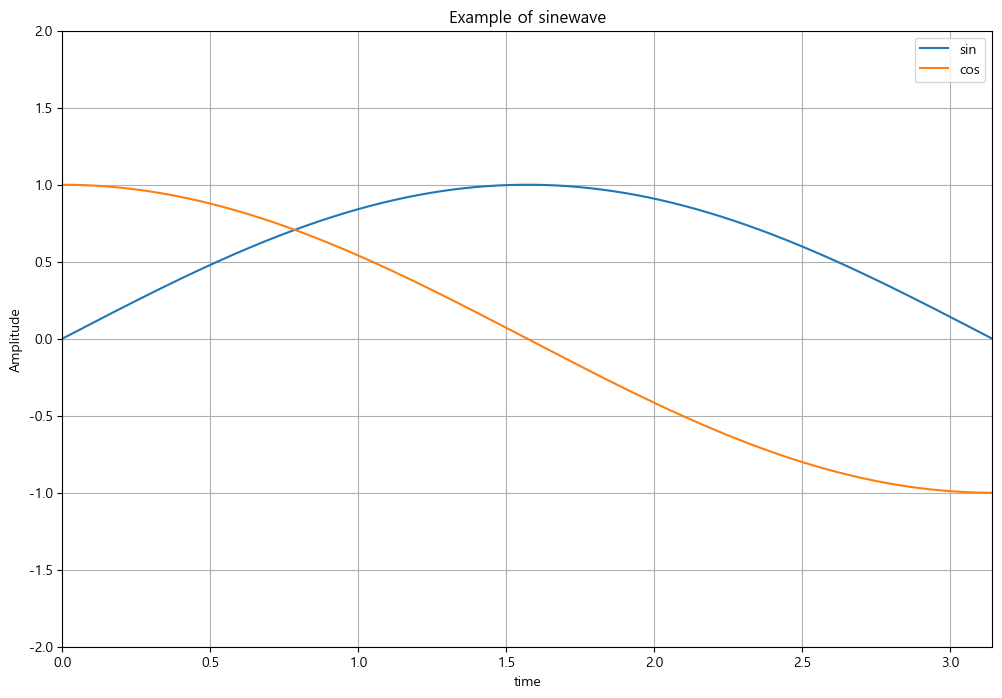

In [46]:
# 선 그래프 
plt.figure(figsize=(12,8))
plt.plot(x,y, label='sin')
plt.plot(x, np.cos(x), label='cos')
plt.title('Example of sinewave') # 타이틀 표시
plt.grid() # 그리드 표시
plt.legend() # 범례 표시
plt.xlabel('time') # x축 제목 설정
plt.ylabel('Amplitude') # y축 제목 설정
plt.xlim(0,np.pi) # np.pi :3.141592 # x축 표시 범위 지정
plt.ylim(-2,2) # y축의 표시 범위 지정

plt.show()

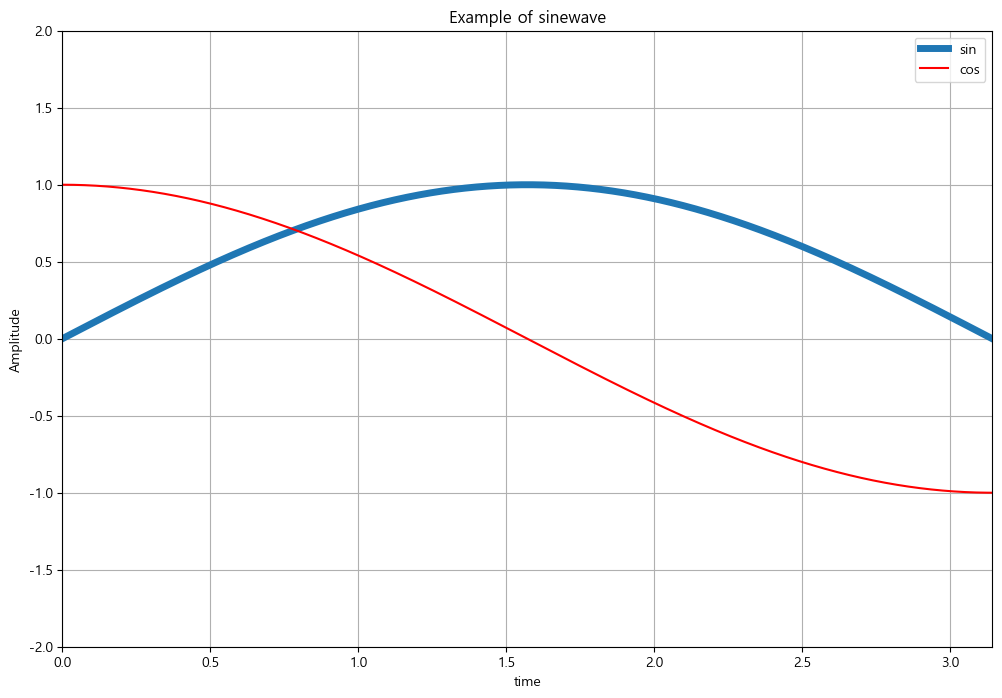

In [50]:
# 선 그래프 
plt.figure(figsize=(12,8))
plt.plot(x,y, lw=5, label='sin') # 선두께 지정 : lw
plt.plot(x, np.cos(x),'r', label='cos') # 'r' : red
plt.title('Example of sinewave') # 타이틀 표시
plt.grid() # 그리드 표시
plt.legend() # 범례 표시
plt.xlabel('time') # x축 제목 설정
plt.ylabel('Amplitude') # y축 제목 설정
plt.xlim(0,np.pi) # np.pi :3.141592 # x축 표시 범위 지정
plt.ylim(-2,2) # y축의 표시 범위 지정

plt.show()

In [52]:
# 선의 모양, 두께, 색 지정
# 데이터 생성
t = np.arange(0,5,0.5) # (start, end, step)
print(t, len(t))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] 10


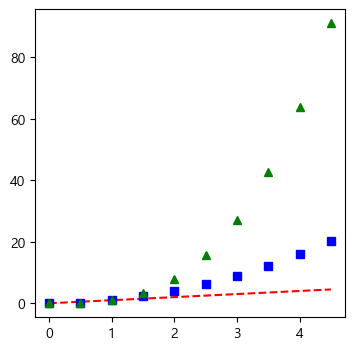

In [59]:
plt.figure(figsize=(4,4))
# plt.plot(t,t)
plt.plot(t,t, 'r--') # r: red, -- : dashed(모양)
plt.plot(t,t**2, 'bs') # b: blue, s(square) : 마커모양(사각형)
plt.plot(t,t**3, 'g^') # g: green, ^(triangle) : 마커모양(삼각형)

plt.show()

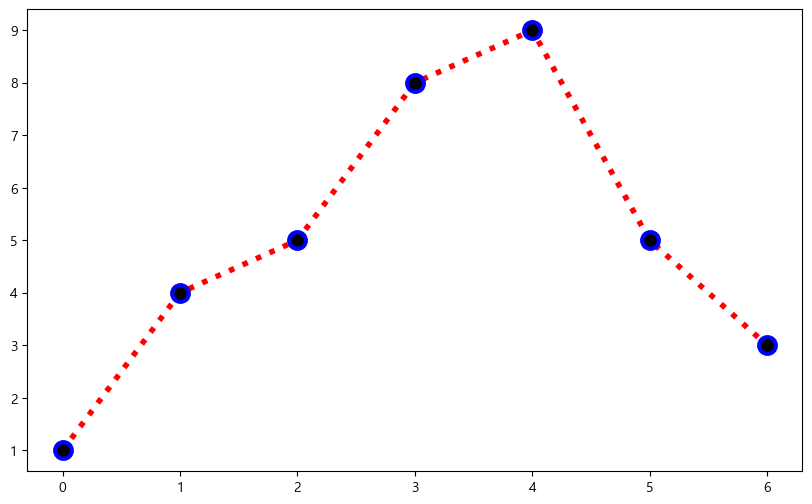

In [70]:
# 선그래프 설정
# 데이터 
x = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]

plt.figure(figsize=(10,6))
plt.plot(
    x,y, color='red'    # color => c
    , linewidth=4       # lw=4 동일
    , linestyle='dotted' # ls='solid', dashed, dotted, dash-dot
    , marker='o' # 점모양
    , markeredgecolor='b' # 점 바깥 경계선 색 blue
    , markerfacecolor='k' # 점의 면색 지정
    , markeredgewidth=3 # 점의 경계선 두께 지정
    , markersize=12 # 점의 크기
)
plt.show()

In [76]:

# 산점도 : scatter(점찍기) => 데이터 분포 확인시 사용, 데이터의 상관관계 확인
x1 = np.arange(0,10) # [0~9]
x2 = np.array([9,8,7,9,8,3,2,4,3,4])

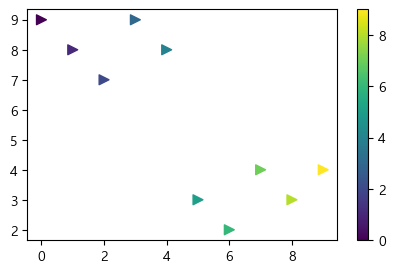

In [87]:
colormap = x1
plt.figure(figsize=(5,3))
plt.scatter(x1,x2, marker='>', s=50, c=colormap)
plt.colorbar()


plt.show()

---
#### CCTV 
---

In [88]:
data_result.head()

,소계,최근증가율,인구수,한국인,외쿡인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<Axes: xlabel='구별'>

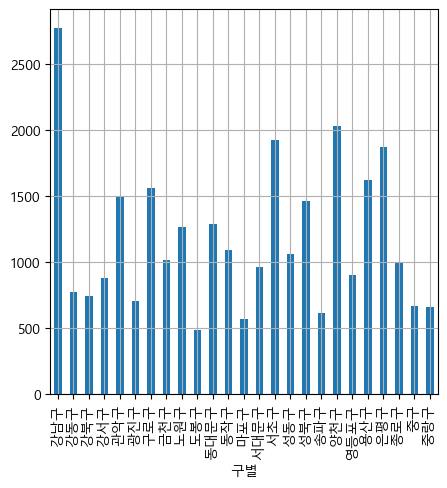

In [90]:
# 데이터프레임에서 차트 구성할 수 있다
data_result['소계'].plot(
    kind='bar' # barh , bar
    , grid=True
    , figsize=(5,5)
)


<Axes: ylabel='구별'>

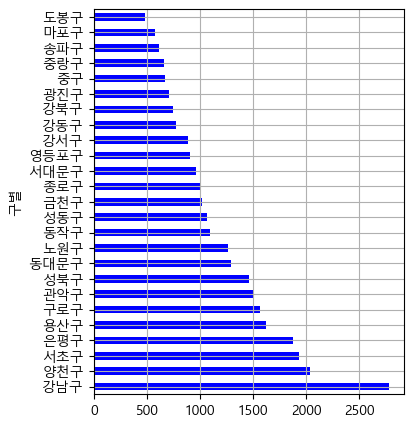

In [97]:
data_result['소계'].sort_values(ascending=False).plot(
    kind='barh'
    , grid= True
    , figsize =(4,5)
    , color = 'blue'
)


In [103]:
# 데이터 가공 시각화 : 소계 / 인구수 * 100
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수']*100


<Axes: ylabel='구별'>

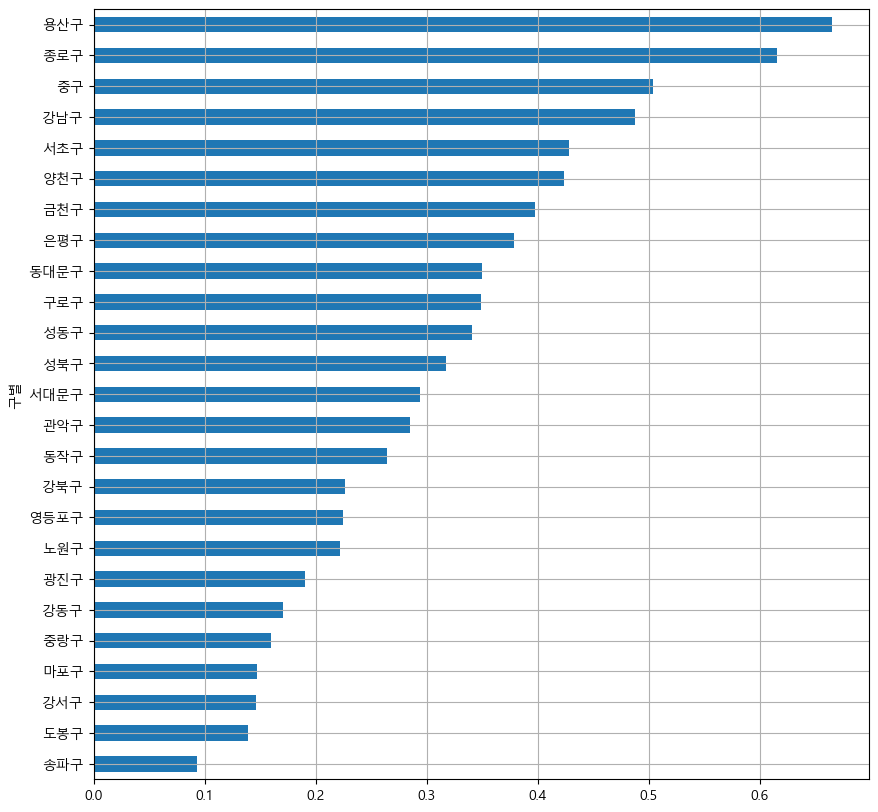

In [105]:
# 인구수에 비해 CCTV 대수 많은 곳을 분석, 시각화 
data_result['CCTV비율'].sort_values().plot(
    kind='barh'
    , grid=True
    , figsize=(10,10)   
)


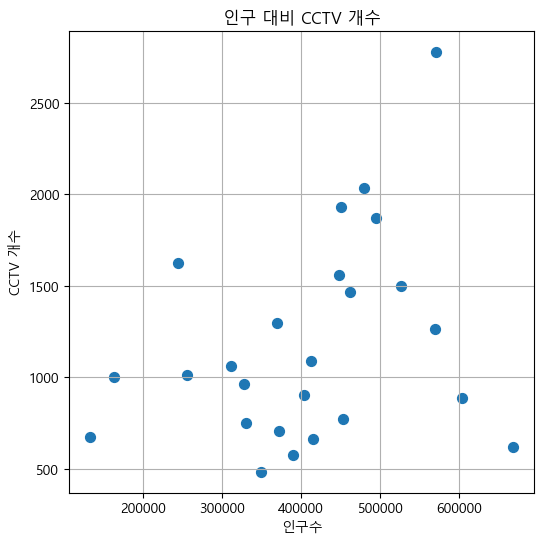

In [108]:
# scatter
# 산점도 : 관계를 나타낸다. 인구수, 소계(CCTV개수)
plt.figure(figsize=(6,6))

plt.scatter(
    data_result['인구수'] # x축
    , data_result['소계'] # y축
    , s = 50 
)
plt.title('인구 대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()


plt.show()

In [111]:
# 직선의 함수 구하기
# 1. 계수 찾기 f(x) = a*x +b에서 a,b 찾기 : np.polyfit()
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
print(fp1)
# 2. 위 계수로 1차함수 오브젝트 생성 : np.ploy1d(ployfit결과)

f1 = np.poly1d(fp1)
f1

[1.30916415e-03 6.45066497e+02]


poly1d([1.30916415e-03, 6.45066497e+02])

In [ ]:
# np.linspace(구간시작, 구간끝, 구간나누어서 나온 개수)

for pop in np.linspace(100000,700000, 100):
    print(pop, ' : ',f1(pop))
f1(100000), f1(700000)

100000.0  :  775.9829117091164
106060.60606060606  :  783.9172398984738
112121.21212121213  :  791.8515680878311
118181.81818181818  :  799.7858962771884
124242.42424242424  :  807.7202244665457
130303.0303030303  :  815.654552655903
136363.63636363635  :  823.5888808452603
142424.24242424243  :  831.5232090346176
148484.84848484848  :  839.4575372239749
154545.45454545456  :  847.3918654133323
160606.0606060606  :  855.3261936026896
166666.6666666667  :  863.2605217920469
172727.27272727274  :  871.1948499814042
178787.87878787878  :  879.1291781707615
184848.48484848486  :  887.0635063601189
190909.0909090909  :  894.9978345494762
196969.69696969696  :  902.9321627388335
203030.30303030304  :  910.8664909281908
209090.90909090912  :  918.8008191175481
215151.51515151514  :  926.7351473069054
221212.12121212122  :  934.6694754962627
227272.7272727273  :  942.60380368562
233333.33333333334  :  950.5381318749774
239393.9393939394  :  958.4724600643347
245454.54545454547  :  966.40678825

(np.float64(775.9829117091164), np.float64(1561.4814024554908))

In [118]:
fx = np.linspace(100000,700000,100) # 100개 구간 설정



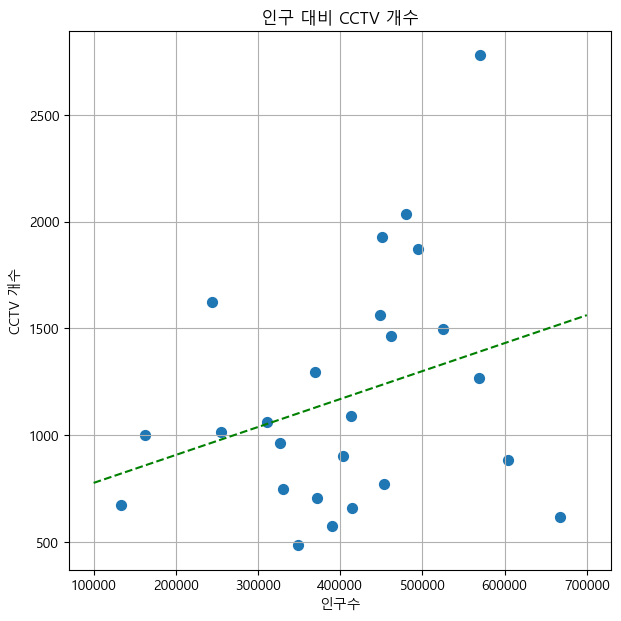

In [123]:
# scatter
# 산점도 : 관계를 나타낸다. 인구수, 소계(CCTV개수)
plt.figure(figsize=(7,7))

plt.scatter( # 산점도 출력
    data_result['인구수'] # x축
    , data_result['소계'] # y축
    , s = 50 
)
plt.plot( # 선그래프 출력
    fx # X축 : 10만 ~ 70만 인구수 100개 구간 값
    , f1(fx) # 1차방정식을 타고 나온 CCTV 개수
    , ls='dashed'
    , color='g'
)


plt.title('인구 대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()


plt.show()

In [128]:
# 오차 구하기 : 너무 많거나 적거나 한 '구'를 찾기 10개
data_result['오차'] =\
    np.abs(data_result['소계'] - f1(data_result['인구수'])) 

data_result.sort_values(by='오차', ascending=False)['오차'].head(10)

구별
강남구    1388.055355
송파구     900.911312
양천구     760.563512
서초구     695.403794
용산구     659.231690
도봉구     616.501341
마포구     581.180999
은평구     580.698457
강서구     551.503155
중랑구     527.718965
Name: 오차, dtype: float64

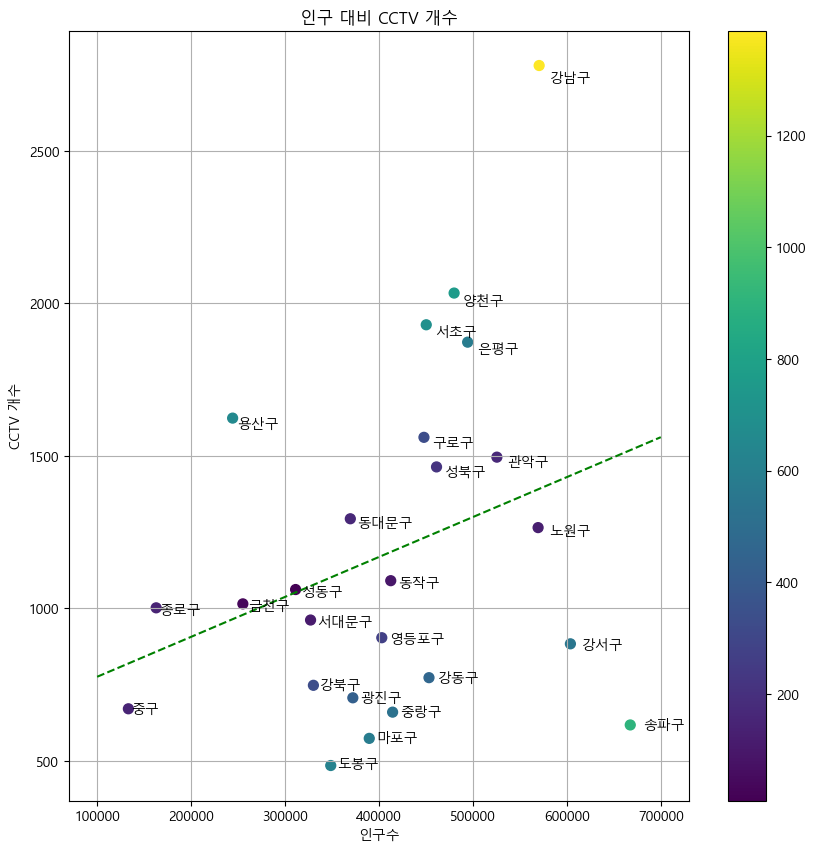

In [141]:
# scatter
# 산점도 : 관계를 나타낸다. 인구수, 소계(CCTV개수)
plt.figure(figsize=(10,10))

plt.scatter( # 산점도 출력
    data_result['인구수'] # x축
    , data_result['소계'] # y축
    , s = 50
    , c=data_result['오차'] # 오차 값으로 색을 준다 
)
plt.plot( # 선그래프 출력
    fx # X축 : 10만 ~ 70만 인구수 100개 구간 값
    , f1(fx) # 1차방정식을 타고 나온 CCTV 개수
    , ls='dashed'
    , color='g'
)
for n in range(len(data_result.index)): # [0~24]가 들어있는 list
    plt.text(
        data_result['인구수'].iloc[n] * 1.02 # x축(인구수), n번째 인구수 추출
        , data_result['소계'].iloc[n] * 0.98 # y축(CCTV개수), n번째 CCTV 개수 추출
        , data_result.index[n] # 표시할 텍스트 (구이름) , n번째 구이름 추출
        , fontsize=10
    )
    

plt.title('인구 대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.colorbar()

plt.show()


In [ ]:
# 위 코드 보충설명
print(data_result.index)
print(len(data_result.index))
for n in range(len(data_result.index)):
    print(n, end=' ')
data_result['인구수']

In [146]:
# 오차로 정렬한 데이터프레임 생성
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head


<bound method NDFrame.head of         소계       최근증가율       인구수       한국인      외쿡인      고령자     외국인비율  \
구별                                                                       
강남구   2780  150.619195  570500.0  565550.0   4950.0  63167.0  0.867660   
송파구    618  104.347826  667483.0  660584.0   6899.0  72506.0  1.033584   
양천구   2034   34.671731  479978.0  475949.0   4029.0  52975.0  0.839413   
서초구   1930   63.371266  450310.0  445994.0   4316.0  51733.0  0.958451   
용산구   1624   53.216374  244203.0  229456.0  14747.0  36231.0  6.038828   
도봉구    485  246.638655  348646.0  346629.0   2017.0  51312.0  0.578524   
마포구    574  212.101911  389649.0  378566.0  11083.0  48765.0  2.844355   
은평구   1873   85.237258  494388.0  489943.0   4445.0  72334.0  0.899091   
강서구    884  134.793814  603772.0  597248.0   6524.0  72548.0  1.080540   
중랑구    660   79.960707  414503.0  409882.0   4621.0  56774.0  1.114829   
강동구    773  166.490765  453233.0  449019.0   4214.0  54622.0  0.929765   
광진구    7

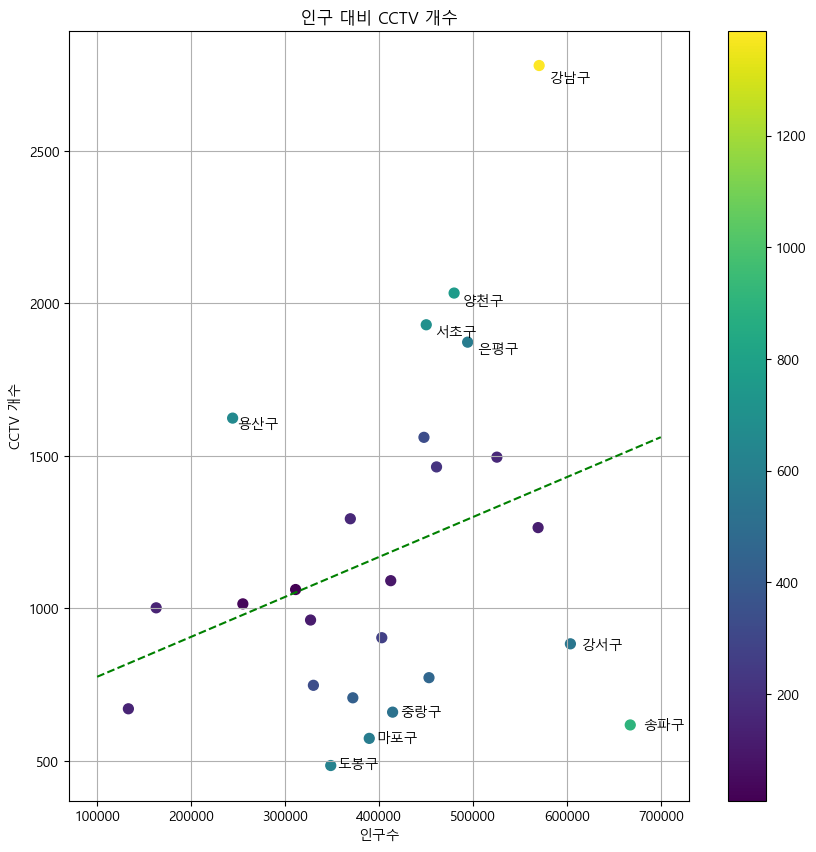

In [143]:
# scatter
# 산점도 : 관계를 나타낸다. 인구수, 소계(CCTV개수)
plt.figure(figsize=(10,10))

plt.scatter( # 산점도 출력
    data_result['인구수'] # x축
    , data_result['소계'] # y축
    , s = 50
    , c=data_result['오차'] # 오차 값으로 색을 준다 
)
plt.plot( # 선그래프 출력
    fx # X축 : 10만 ~ 70만 인구수 100개 구간 값
    , f1(fx) # 1차방정식을 타고 나온 CCTV 개수
    , ls='dashed'
    , color='g'
)
for n in range(10): # [0~24]가 들어있는 list
    plt.text(
        df_sort['인구수'].iloc[n] * 1.02 # x축(인구수), n번째 인구수 추출
        , df_sort['소계'].iloc[n] * 0.98 # y축(CCTV개수), n번째 CCTV 개수 추출
        , df_sort.index[n] # 표시할 텍스트 (구이름) , n번째 구이름 추출
        , fontsize=10
    )
    

plt.title('인구 대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.colorbar()

plt.show()
